***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [3]:
dados.head(10)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
classes = [0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [5]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [6]:
frequencia = pd.value_counts(pd.cut(x = dados['Renda'], bins = classes, labels = labels, include_lowest = True))
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [7]:
percentual = pd.value_counts(pd.cut(x = dados['Renda'], bins = classes, labels = labels, include_lowest = True), normalize = True) * 100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [8]:
freq_perc_renda = pd.DataFrame({'Frequência': frequencia, 'Percentual': percentual})
freq_perc_renda.sort_index(ascending = False, inplace = True)
freq_perc_renda

,Frequência,Percentual
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

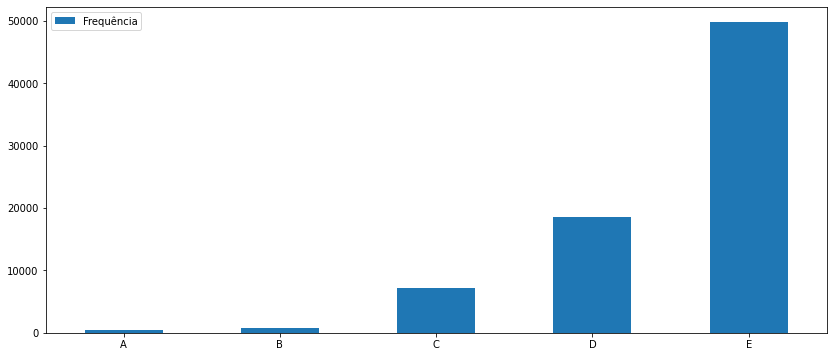

In [9]:
freq_perc_renda['Frequência'].plot.bar(width = 0.5, figsize = (14, 6), legend = True, rot = 0)

> ### Conclusões

A maior parcela da população encontra-se nas classes mais baixas, com destaque para a Classe 'E', com 64,75% da população.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

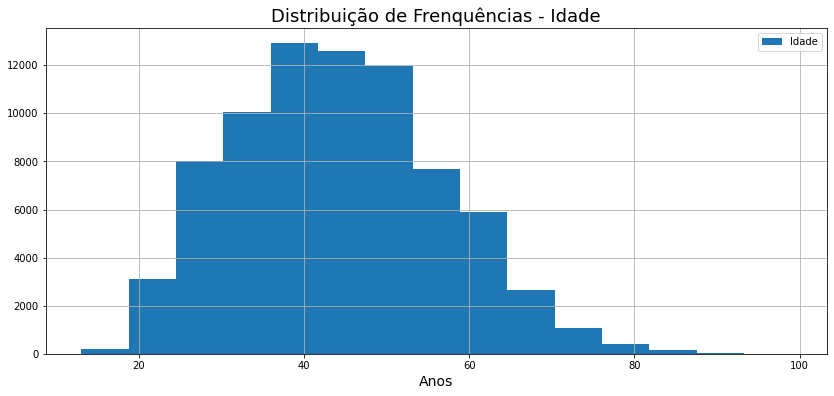

In [10]:
# Idade
h_idade = dados['Idade'].hist(figsize = (14,6), legend = True, bins = 15)
h_idade.set_title('Distribuição de Frenquências - Idade', fontsize = 18)
h_idade.set_xlabel('Anos', fontsize = 14)
h_idade

Text(0.5, 0, 'Reais - R$')

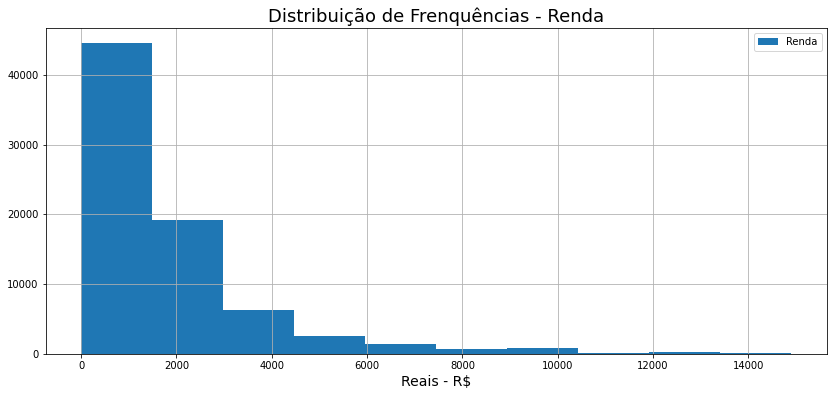

In [11]:
# Renda, query ('Renda < 15000)
h_renda = dados.query('Renda < 15000')['Renda'].hist(figsize = (14,6), legend = True)
h_renda.set_title('Distribuição de Frenquências - Renda', fontsize = 18)
h_renda.set_xlabel('Reais - R$', fontsize = 14)


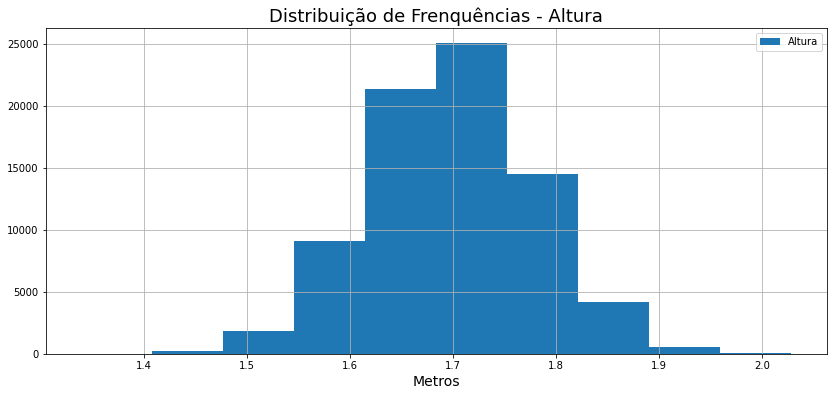

In [12]:
# Altura
h_altura = dados['Altura'].hist(figsize = (14,6), legend = True)
h_altura.set_title('Distribuição de Frenquências - Altura', fontsize = 18)
h_altura.set_xlabel('Metros', fontsize = 14)
h_altura


> ### Conclusões

- Em relação à Idade, vemos que a maioria dos(as) chefes de família concentram-se em torno dos 40 anos.

- Nota-se, também, que a altura tem uma concentração elevada próximo a 1,7m.

- A maioria das(os) chefes de família tem rendas baixas, concentrando abaixo dos R$ 2.000,00.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

Text(0.5, 0, 'Reais - R$')

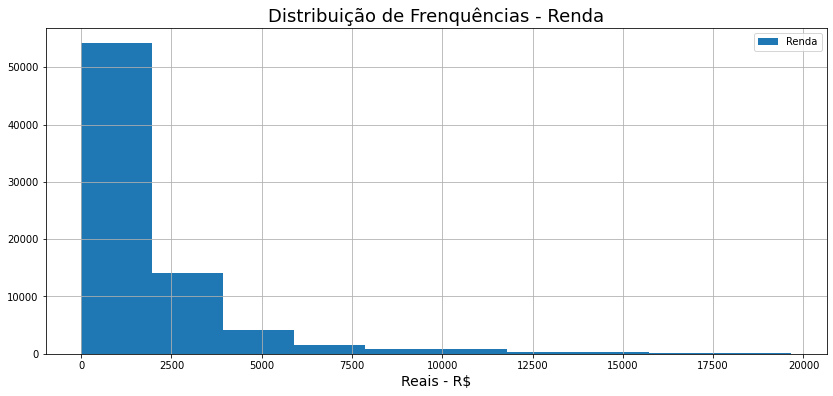

In [13]:
# Renda, query ('Renda < 20000)
h_renda = dados.query('Renda < 20000')['Renda'].hist(figsize = (14,6), legend = True)
h_renda.set_title('Distribuição de Frenquências - Renda', fontsize = 18)
h_renda.set_xlabel('Reais - R$', fontsize = 14)


### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [14]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [15]:
# crosstab por default constroi uma tabela de frequência entre duas variáveis
freq_sexo_cor = pd.crosstab(dados.Sexo, dados['Cor'])
freq_sexo_cor.rename(index = sexo, inplace=True)
freq_sexo_cor.rename(columns = cor, inplace=True)
freq_sexo_cor = freq_sexo_cor.style.set_table_attributes("style='display:inline'").set_caption("Frequência - Sexo x Cor")

freq_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [16]:
percnt_sexo_cor = (pd.crosstab(dados.Sexo, dados['Cor'], normalize = True) * 100).round(2)
percnt_sexo_cor.rename(index = sexo, inplace=True)
percnt_sexo_cor.rename(columns = cor, inplace=True)
percnt_sexo_cor = percnt_sexo_cor.style.set_table_attributes("style='display:inline'").set_caption("Percentual - Sexo x Cor")
percnt_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.330000,28.880000,7.160000,0.310000,32.620000
Feminino,0.130000,12.520000,3.760000,0.150000,14.140000


> ### Conclusões

- Nota-se uma diferença enorme em relação à quantidade de Homens que são chefes de família. Além disso, mais de 46% das pessoas se consideram Pardas.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [17]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [18]:
dados['Renda'].median()

1200.0

### Obtenha a moda

In [19]:
dados.Renda.mode()[0]

788

### Obtenha o desvio médio absoluto

In [20]:
dados.Renda.mad()

1526.4951371644931

### Obtenha a variância

In [21]:
dados['Renda'].var()

11044906.00622118

### Obtenha o desvio-padrão

In [22]:
dados.Renda.std()

3323.3877303470294

### Todos resultados com apenas um método

In [23]:
# pode ter vários resultados em um único método
dados.Renda.agg(['mean', 'median', 'count', 'min', 'max', 'std', 'var', 'mad'])

mean      2.000383e+03
median    1.200000e+03
count     7.684000e+04
min       0.000000e+00
max       2.000000e+05
std       3.323388e+03
var       1.104491e+07
mad       1.526495e+03
Name: Renda, dtype: float64

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [24]:
# crosstab por default constroi uma tabela de frequência entre duas variáveis
renda_sexo_cor = pd.crosstab(dados.Cor, dados['Sexo'], aggfunc = {'mean', 'median', 'max'}, values = dados['Renda']).round(2)
renda_sexo_cor.rename(index = cor, inplace=True)
renda_sexo_cor.rename(columns = sexo, inplace=True)
renda_sexo_cor = renda_sexo_cor.style.set_table_attributes("style='display:inline'").set_caption("Máximo, Média e Mediana - Sexo x Cor")

renda_sexo_cor

> ### Conclusões

- No geral, os homens chefes de família ganham em média mais que as mulheres.

- Nota-se que a Cor 'Indígena' é a única média que na qual 'Feminino' é maior que a 'Masculino', provavelmente alvancada pelo valor máximo de R$ 120.000,00.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [25]:
renda2_sexo_cor = pd.crosstab(dados.Cor, dados['Sexo'], aggfunc = {'var', 'std', 'mad'}, values = dados['Renda']).round(2)
renda2_sexo_cor.rename(index = cor, inplace = True)
renda2_sexo_cor.rename(columns = sexo, inplace = True)
renda2_sexo_cor

mad                std                    var              
Sexo     Masculino Feminino Masculino  Feminino    Masculino      Feminino
Cor                                                                       
Indígena    798.91  3007.89   1204.09  11957.50   1449841.13  1.429818e+08
Branca     2261.01  1670.97   4750.79   3251.01  22570023.41  1.056909e+07
Preta       975.60   705.45   1936.31   1349.80   3749293.59  1.821960e+06
Amarela    3709.60  2549.15   5740.82   3731.17  32957069.62  1.392166e+07
Parda      1125.83   811.58   2312.09   1596.23   5345747.15  2.547960e+06

> ### Conclusões

- Nota-se um desvio absurdo em 'Indígena e Feminino', provavelmente devido ao valor máximo de renda em R$ 120.000,00, que destoa das demais.

- É notório, também, que a dispersão é maior no sexo Masculinio que no Feminino, com exceção do caso citado acima.

- A cor Preta é a que aprenseta a menor dispersão de Renda, enquanto a cor Amarela aprensenta a maior.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

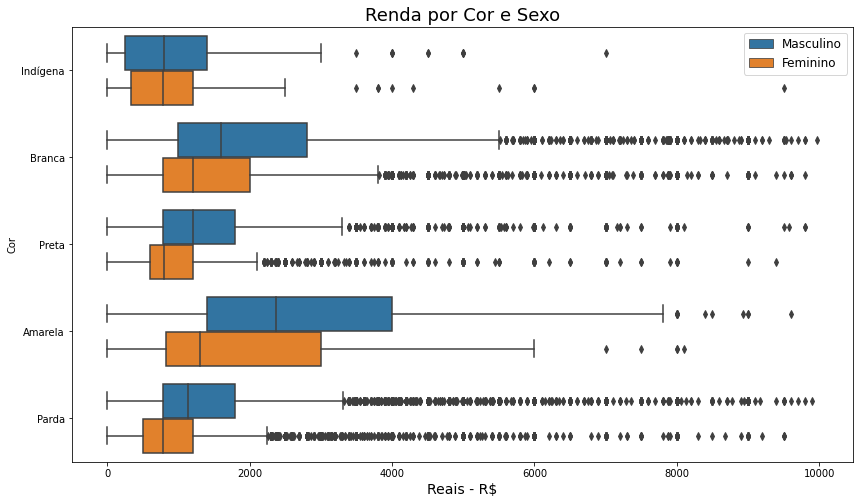

In [26]:
box_renda = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data=dados.query('Renda < 10000'), orient = 'h')
box_renda.figure.set_size_inches(14, 8)
box_renda.set_title('Renda por Cor e Sexo', fontsize = 18)
box_renda.set_xlabel('Reais - R$', fontsize = 14)
box_renda.set_yticklabels(['Indígena', 'Branca',  'Preta', 'Amarela', 'Parda'])

#destructuring para legenda
handle, labels1 = box_renda.get_legend_handles_labels()
box_renda.legend(handle, ['Masculino', 'Feminino'], fontsize = 12)

box_renda

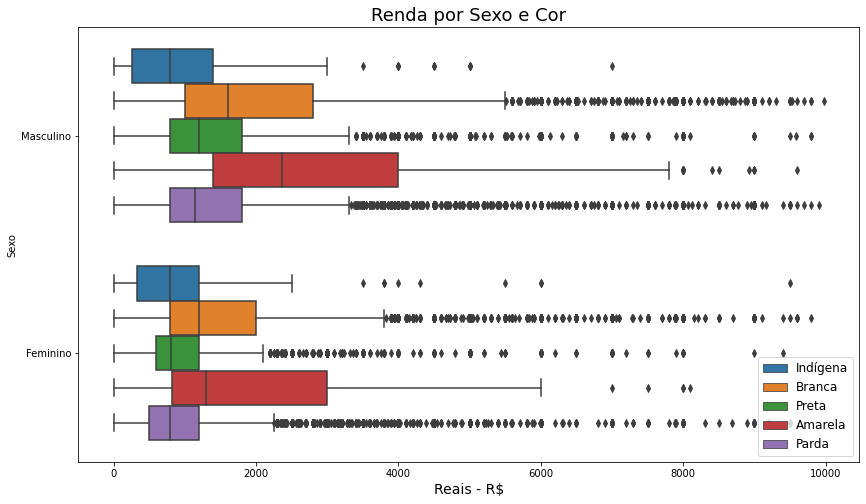

In [27]:
box_renda = sns.boxplot(x = 'Renda', y = 'Sexo', hue = 'Cor', data=dados.query('Renda < 10000'), orient = 'h')
box_renda.figure.set_size_inches(14, 8)
box_renda.set_title('Renda por Sexo e Cor', fontsize = 18)
box_renda.set_xlabel('Reais - R$', fontsize = 14)
box_renda.set_yticklabels(['Masculino', 'Feminino'])

#destructuring para legenda
handle, labels1 = box_renda.get_legend_handles_labels()
box_renda.legend(handle, ['Indígena', 'Branca',  'Preta', 'Amarela', 'Parda'], fontsize = 12)

box_renda

> ### Conclusões

- Nota-se pelos Boxplots que a Renda do Sexo Masculino são maiores que as do Sexo Feminino.

- Também é notório que a Renda das pessoas Brancas e Amarelas são bem maiores que a das pessoas Pretas, Pardas e Indígenas, evidenciando problemas sociais.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [28]:
from scipy import stats
stats.percentileofscore(dados['Renda'], 788, kind = 'weak')

28.86777719937533

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [29]:
# 99% ganham abaixo de R$ 15.000,00
dados['Renda'].quantile(.99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [30]:
renda_sexo_anos_estudo = pd.crosstab(dados['Anos de Estudo'], dados['Sexo'], aggfunc = {'mean', 'median', 'max', 'std'}, values = dados['Renda']).round(2)
renda_sexo_anos_estudo.rename(index = anos_de_estudo, inplace = True)
renda_sexo_anos_estudo.rename(columns = sexo, inplace = True)
renda_sexo_anos_estudo

max            ...       std         
Sexo                           Masculino  Feminino  ... Masculino Feminino
Anos de Estudo                                      ...                   
Sem instrução e menos de 1 ano   30000.0   10000.0  ...   1023.90   639.31
1 ano                            30000.0    2000.0  ...   1331.95   425.29
2 anos                           40000.0    4000.0  ...   1435.17   498.23
3 anos                           80000.0    3500.0  ...   2143.80   424.12
4 anos                           50000.0   10000.0  ...   1419.82   629.55
5 anos                           35000.0    8000.0  ...   1484.65   635.78
6 anos                           25000.0    6000.0  ...   1476.63   574.55
7 anos                           40000.0    9000.0  ...   1419.71   602.04
8 anos                           30000.0   18000.0  ...   1515.58   896.78
9 anos                           60000.0   20000.0  ...   2137.66   973.22
10 anos                          45000.0    6000.0  ...   2078.61   620.61
11 anos                         200000.0  100000.0  ...   2676.54  1819.04
12 anos                          30000.0  120000.0  ...   2268.08  4851.83
13 anos                          25000.0   20000.0  ...   2797.12  2053.79
14 anos                          50000.0   20000.0  ...   3987.21  2064.08
15 anos ou mais                 200000.0  100000.0  ...   7447.61  4212.77
Não determinados                  7000.0    3000.0  ...    979.65   459.99

[17 rows x 8 columns]

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

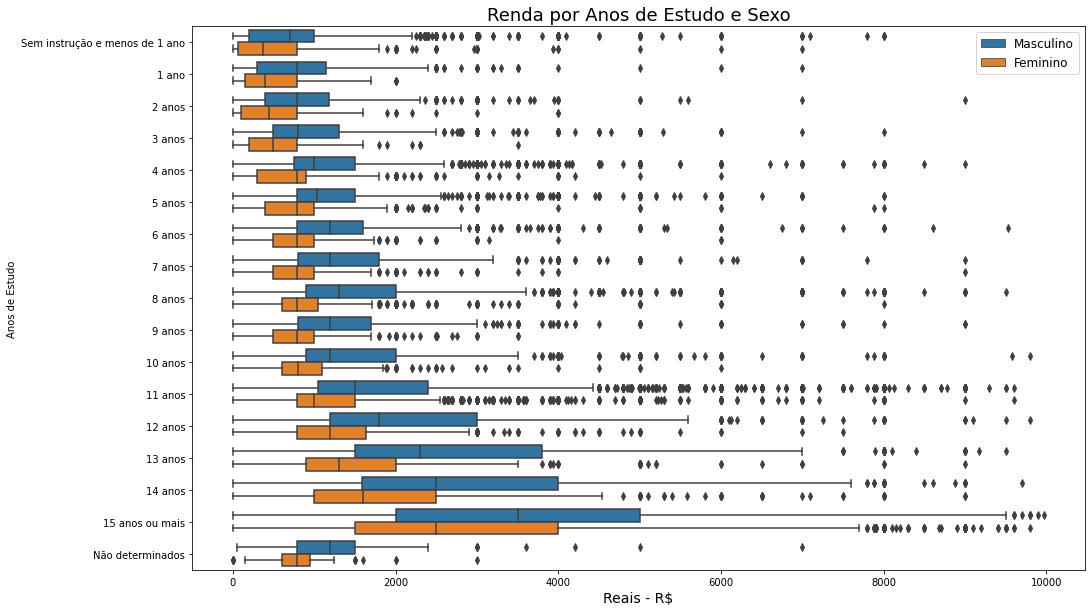

In [31]:
box_renda = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data=dados.query('Renda < 10000'), orient = 'h')
box_renda.figure.set_size_inches(16, 10)
box_renda.set_title('Renda por Anos de Estudo e Sexo', fontsize = 18)
box_renda.set_xlabel('Reais - R$', fontsize = 14)
box_renda.set_yticklabels([chave for chave in anos_de_estudo.values()])

# destructuring para legenda
handle, labels1 = box_renda.get_legend_handles_labels()
box_renda.legend(handle, ['Masculino', 'Feminino'], fontsize = 12)

box_renda

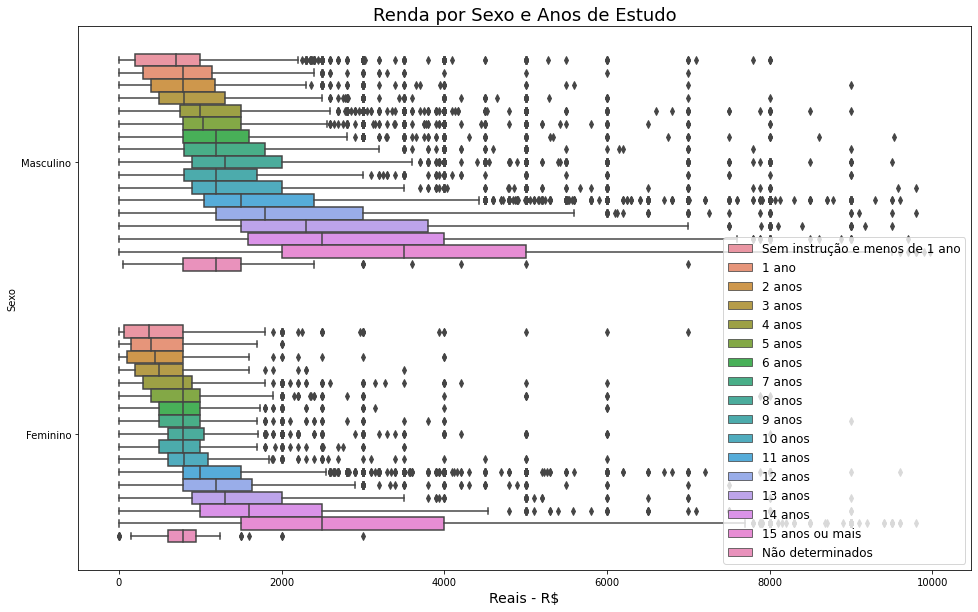

In [32]:
box_renda = sns.boxplot(x = 'Renda', y = 'Sexo', hue = 'Anos de Estudo', data=dados.query('Renda < 10000'), orient = 'h')
box_renda.figure.set_size_inches(16, 10)
box_renda.set_title('Renda por Sexo e Anos de Estudo', fontsize = 18)
box_renda.set_xlabel('Reais - R$', fontsize = 14)
box_renda.set_yticklabels(['Masculino', 'Feminino'])

# destructuring para legenda
handle, labels1 = box_renda.get_legend_handles_labels()
box_renda.legend(handle, [chave for chave in anos_de_estudo.values()], fontsize = 12)

box_renda

> ### Conclusões

- Nota-se a partir do primeiro gráfico 'Renda por Anos de Estudo e Sexo' que, quanto maior a quantidade de Anos de Estudo, maior a Renda da(o) chefe de família.

- Nota-se, ainda, que a Renda do Sexo Masculino é maior que a do Sexo Feminino. Conclui-se que, em média, homens estatisticamente precisam estudar menos para alcançar a mesma faixa de Renda que mulheres.

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [34]:
group_uf_mmms = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']}).round(2)
group_uf_mmms.rename(index = uf, inplace = True)
group_uf_mmms.rename(columns = {'mean': 'Média', 'median': 'Mediana', 'max': 'Renda Máxima', 'std': 'Desvio Padrão'}, inplace = True)
group_uf_mmms

Renda                                   
                       Média Mediana Renda Máxima Desvio Padrão
UF                                                             
Rondônia             1789.76    1200        50000       2406.16
Acre                 1506.09     900        30000       2276.23
Amazonas             1445.13     900        22000       1757.94
Roraima              1783.59    1000        20000       2079.66
Pará                 1399.08     850        50000       2053.78
Amapá                1861.35    1200        15580       2020.69
Tocantins            1771.09    1000        60000       2934.59
Maranhão             1019.43     700        30000       1887.82
Piauí                1074.55     750        40000       2373.36
Ceará                1255.40     789        25000       1821.96
Rio Grande do Norte  1344.72     800        15500       1651.81
Paraíba              1293.37     788        30000       1950.27
Pernambuco           1527.08     900        50000       2389.62
Alagoas              1144.55     788        11000       1237.86
Sergipe              1109.11     788        16000       1479.00
Bahia                1429.65     800       200000       3507.92
Minas Gerais         2056.43    1200       100000       3584.72
Espírito Santo       2026.38    1274       100000       3513.85
Rio de Janeiro       2496.40    1400       200000       5214.58
São Paulo            2638.10    1600        80000       3503.78
Paraná               2493.87    1500       200000       4302.94
Santa Catarina       2470.85    1800        80000       3137.65
Rio Grande do Sul    2315.16    1500        35000       2913.34
Mato Grosso do Sul   2262.60    1500        42000       3031.42
Mato Grosso          2130.65    1500        35000       2542.63
Goiás                1994.58    1500        30000       2221.93
Distrito Federal     4241.95    2000       100000       5550.46

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

[Text(0, 0, 'Rondônia'),
 Text(0, 0, 'Acre'),
 Text(0, 0, 'Amazonas'),
 Text(0, 0, 'Roraima'),
 Text(0, 0, 'Pará'),
 Text(0, 0, 'Amapá'),
 Text(0, 0, 'Tocantins'),
 Text(0, 0, 'Maranhão'),
 Text(0, 0, 'Piauí'),
 Text(0, 0, 'Ceará'),
 Text(0, 0, 'Rio Grande do Norte'),
 Text(0, 0, 'Paraíba'),
 Text(0, 0, 'Pernambuco'),
 Text(0, 0, 'Alagoas'),
 Text(0, 0, 'Sergipe'),
 Text(0, 0, 'Bahia'),
 Text(0, 0, 'Minas Gerais'),
 Text(0, 0, 'Espírito Santo'),
 Text(0, 0, 'Rio de Janeiro'),
 Text(0, 0, 'São Paulo'),
 Text(0, 0, 'Paraná'),
 Text(0, 0, 'Santa Catarina'),
 Text(0, 0, 'Rio Grande do Sul'),
 Text(0, 0, 'Mato Grosso do Sul'),
 Text(0, 0, 'Mato Grosso'),
 Text(0, 0, 'Goiás'),
 Text(0, 0, 'Distrito Federal')]

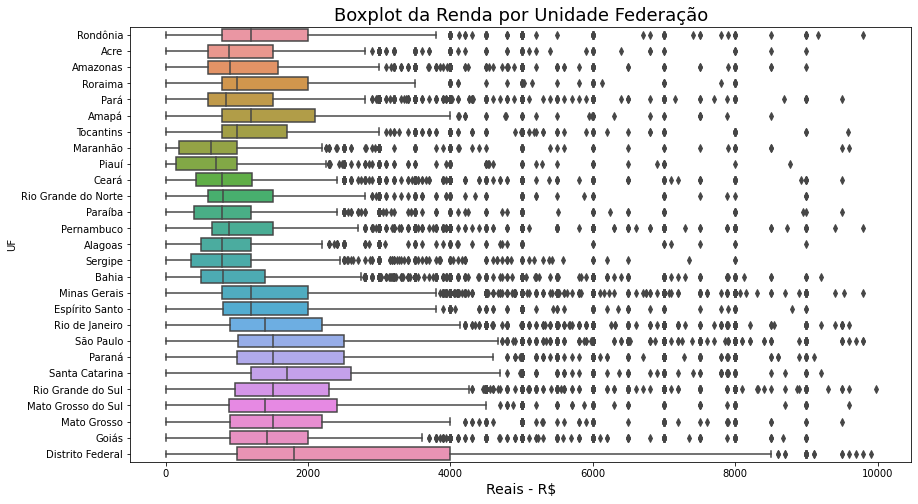

In [44]:
box_renda = sns.boxplot(x = 'Renda', y = 'UF', data=dados.query('Renda < 10000'), orient = 'h')
box_renda.figure.set_size_inches(14, 8)
box_renda.set_title('Boxplot da Renda por Unidade Federação', fontsize = 18)
box_renda.set_xlabel('Reais - R$', fontsize = 14)
box_renda.set_yticklabels([chave for chave in uf.values()])
# box_renda.set_yticklabels([chave for chave in anos_de_estudo.values()])


> ### Conclusões

- Nota-se que o Distrito Federal é a Unidade Federativa que possui consideravelmente a maior Média de Renda;
- O DF também é a UF com a maior dispersão, tem um elevado Desvio Padrão;
- O boxplot plot nos aprenseta uma Assimetria à Direita (Moda < Mediana < Media).

- Os estados do Sul e Sudeste possuem maiores Médias de Renda por chefe de família.

- Enquanto as regiões Norte-Nordeste possuem as menores Médias de Renda, com destaque negativo para Maranhão e Piauí, com as menores Médias de toda a região.